In [1]:
!pip install rasterio numpy matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 40.5 MB/s eta 0:00:00


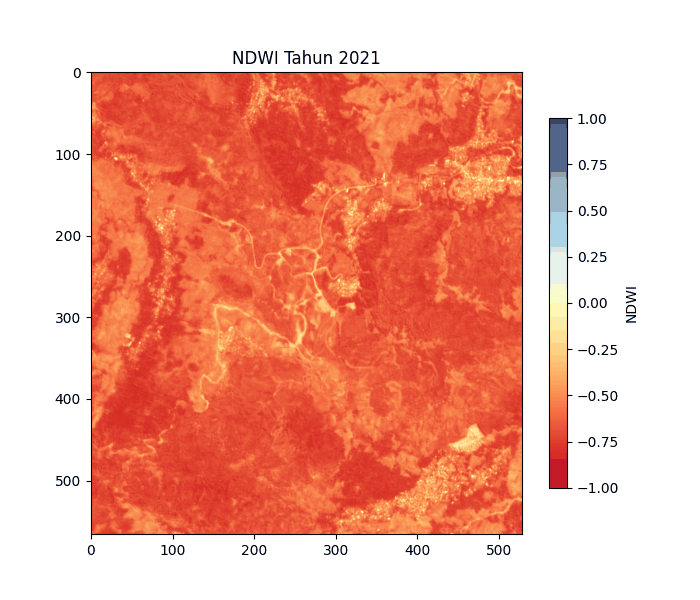

In [11]:


import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image
import os

data_dir = "/content"
years = [2021, 2022, 2023, 2024, 2025]

def calc_ndwi(year):
    b3 = os.path.join(data_dir, f"BENDUNGAN_{year}B3.tif")
    b8 = os.path.join(data_dir, f"BENDUNGAN_{year}B8.tif")
    with rasterio.open(b3) as src3, rasterio.open(b8) as src8:
        green = src3.read(1).astype("float32")
        nir = src8.read(
            1,
            out_shape=(1, src3.height, src3.width),
            resampling=Resampling.bilinear
        ).astype("float32")
        ndwi = (green - nir) / (green + nir)
        ndwi[np.isinf(ndwi)] = np.nan
    return ndwi

ndwi_data = {y: calc_ndwi(y) for y in years}

fig, ax = plt.subplots(figsize=(7, 6))
img = ax.imshow(ndwi_data[years[0]], cmap="RdYlBu", vmin=-1, vmax=1)
title = ax.set_title(f"NDWI Tahun {years[0]}")
plt.colorbar(img, ax=ax, label="NDWI", shrink=0.8)

def update(frame):
    year = years[frame]
    img.set_data(ndwi_data[year])
    title.set_text(f"NDWI Tahun {year}")
    return img, title

anim = FuncAnimation(fig, update, frames=len(years), interval=1500, repeat=True)
gif_path = "/content/NDWI_TimeSeries.gif"
anim.save(gif_path, writer=PillowWriter(fps=1))
plt.close()
Image(filename=gif_path)

